In [161]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from networkx.algorithms.coloring import greedy_color

In [162]:
df = pd.read_excel("D:\\DataScience\\std_courses.xlsx")
df.head()

,Student ID,Student Name,Major,Course Code,Course Name,Subject Code,Section
0,20231000,Mohammed Khalid Al-Harbi,Dentistry,DENT 202,Oral Surgery Basics,110701,851025
1,20231001,Ali Mohammed Al-Shammari,Radiology,PHAR 101,Introduction to Pharmacy,110601,577929
2,20231002,Khalid Nasser Al-Qahtani,Nursing,RADI 204,Radiographic Imaging,110901,929549
3,20231003,Khalid Fahad Al-Harbi,Pharmacy,RADI 204,Radiographic Imaging,110901,842057
4,20231004,Khalid Salim Al-Harbi,Radiology,MEDR 201,Medical Records II,110501,944148


In [163]:
df.columns

Index(['Student ID', 'Student Name', 'Major', 'Course Code', 'Course Name',
       'Subject Code', 'Section'],
      dtype='object')

In [164]:
df = df.drop('Section', axis=1)

In [165]:
df = df.drop('Subject Code', axis=1)


In [166]:
df.head()

,Student ID,Student Name,Major,Course Code,Course Name
0,20231000,Mohammed Khalid Al-Harbi,Dentistry,DENT 202,Oral Surgery Basics
1,20231001,Ali Mohammed Al-Shammari,Radiology,PHAR 101,Introduction to Pharmacy
2,20231002,Khalid Nasser Al-Qahtani,Nursing,RADI 204,Radiographic Imaging
3,20231003,Khalid Fahad Al-Harbi,Pharmacy,RADI 204,Radiographic Imaging
4,20231004,Khalid Salim Al-Harbi,Radiology,MEDR 201,Medical Records II


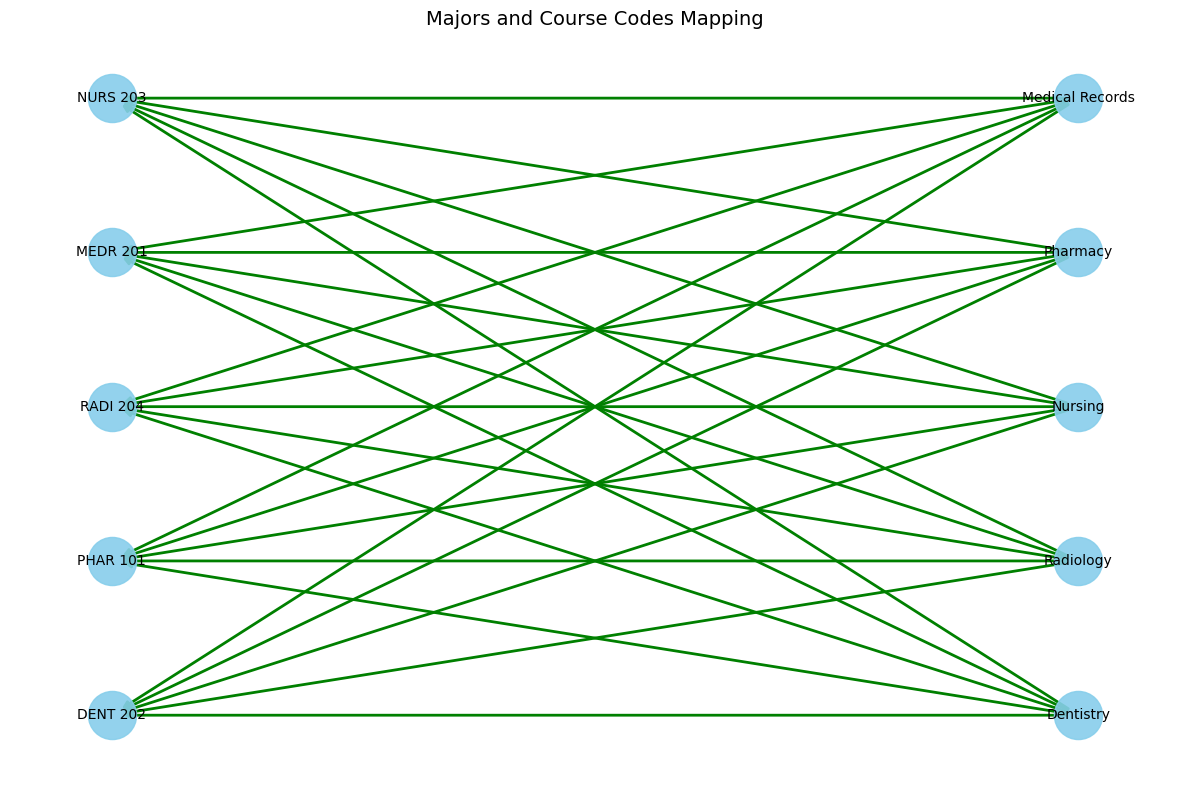

In [167]:
G2 = nx.from_pandas_edgelist(df, source='Major', target='Course Code', create_using=nx.DiGraph())

majors = df['Major'].unique()
courses = df['Course Code'].unique()

pos = {}
x_major = 1
x_course = 0
y_spacing = 1

for i, major in enumerate(majors):
    pos[major] = (x_major, i * y_spacing)

for i, course in enumerate(courses):
    pos[course] = (x_course, i * y_spacing)

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G2, pos, node_size=1200, node_color='skyblue', alpha=0.9)
nx.draw_networkx_labels(G2, pos, font_size=10)

nx.draw_networkx_edges(
    G2, pos, 
    arrows=True, 
    edge_color='green', 
    width=2, 
    arrowsize=10  
)

plt.title("Majors and Course Codes Mapping", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


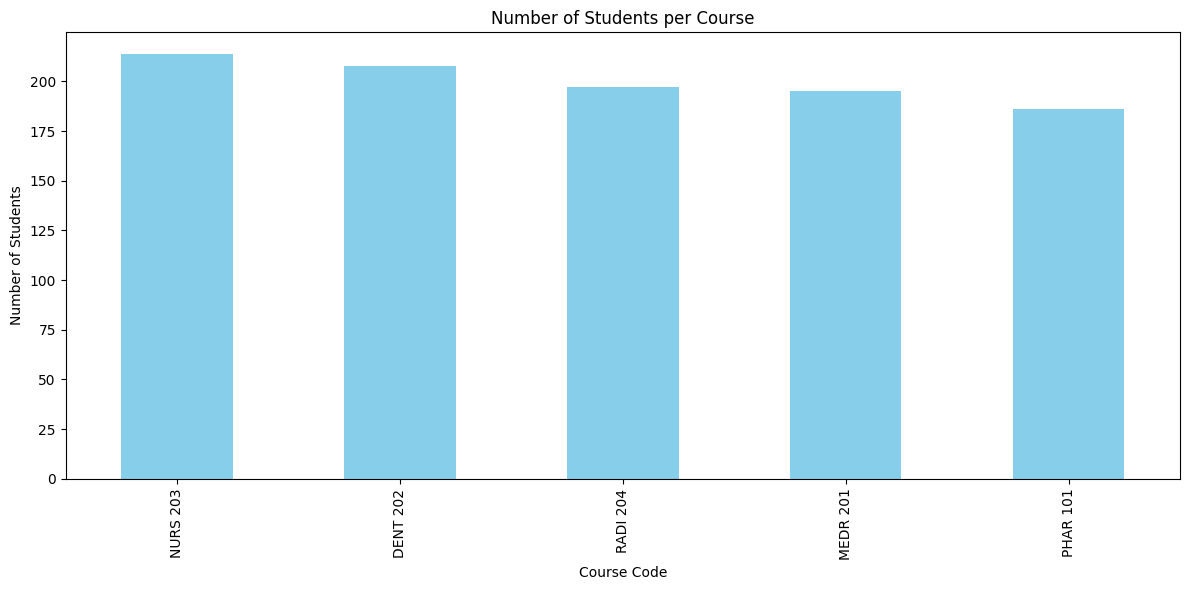

In [168]:
plt.figure(figsize=(12, 6))
course_counts = df['Course Code'].value_counts()
course_counts.plot(kind='bar', title='Number of Students per Course', color='skyblue')
plt.xlabel("Course Code")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

In [173]:
df = df.dropna(subset=["Student ID", "Course Name"])
student_course_pairs = df[["Student ID", "Course Name"]]

In [174]:
student_courses_map = defaultdict(set)
for _, row in student_course_pairs.iterrows():
    student_courses_map[row["Student ID"]].add(row["Course Name"])

In [175]:
G = nx.Graph()
all_courses = set(student_course_pairs["Course Name"])
G.add_nodes_from(all_courses)

In [176]:
for courses in student_courses_map.values():
    course_list = list(courses)
    for i in range(len(course_list)):
        for j in range(i + 1, len(course_list)):
            c1, c2 = course_list[i], course_list[j]
            if G.has_edge(c1, c2):
                G[c1][c2]["weight"] += 1
            else:
                G.add_edge(c1, c2, weight=1)

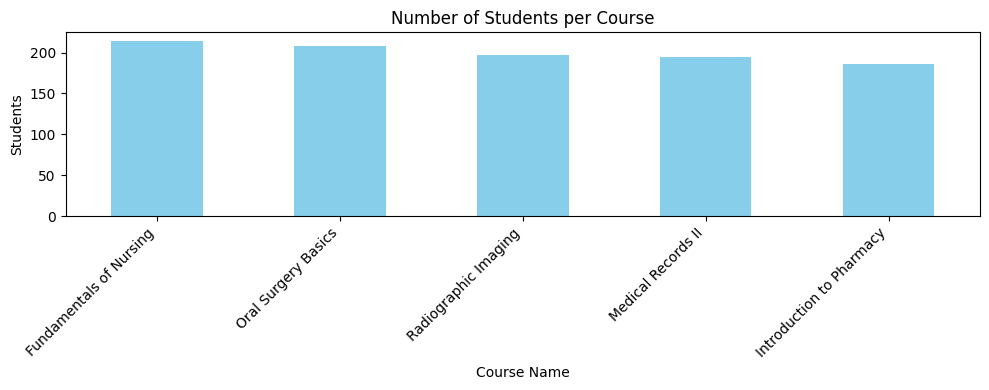

In [177]:
course_counts = df["Course Name"].value_counts()
plt.figure(figsize=(10, 4))
course_counts.plot(kind="bar", color="skyblue")
plt.title("Number of Students per Course")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Students")
plt.tight_layout()
plt.show()

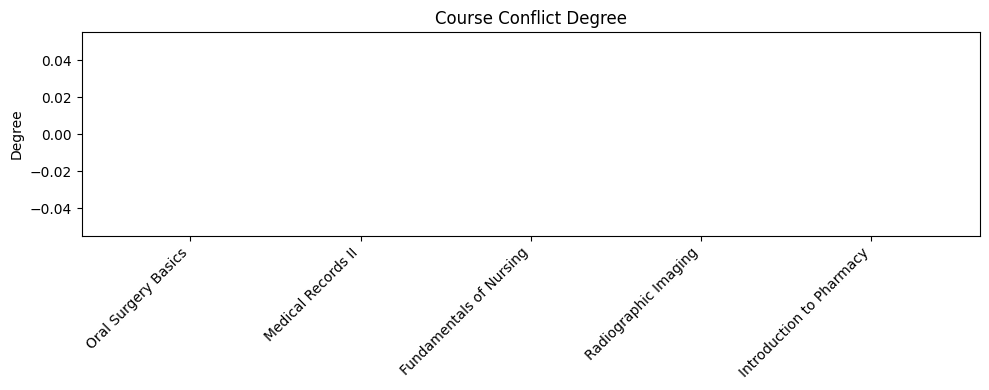

In [178]:
degrees = dict(G.degree())
plt.figure(figsize=(10, 4))
plt.bar(degrees.keys(), degrees.values(), color="salmon")
plt.title("Course Conflict Degree")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Degree")
plt.tight_layout()
plt.show()